# Linear Regression

**Linear regression** is a very popular model that is easy to implement, easy to interpret, and can be fitted even when there is no linear relationship between the predictors, or independent variables, and the dependent variable. Usually, this method comes in two flavors: **simple linear regression** and **multiple linear regression**.

Before we go any further, we need to load the libraries that we will be using.

In [1]:
import pandas                  as pd
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns
import statsmodels.formula.api as smf
import statsmodels.api         as sm

## Simple Linear Regression

Let us assume that we have two variables, one of them dependent, which we call $y$, and another independent, $x$. Furthermore, we suspect that there exists a linear relation between these two variables. If that is the case, the simple linear regression model is a good alternative to explain the interaction of variables $x$ and $y$:

$$y=\beta_0+\beta_1x+\epsilon,$$

where $\beta_0$ and $\beta_1$ are knows as the **parameters of the model**, and $\epsilon$ is a random variable that is called the **error term**. This term is included to account for the variability of $y$ that can not be explained by the linear model. Given the latter, we assume that $\epsilon\sim N(0,\sigma^2)$.

To illustrate how we can use the simple linear regression model, assume that data is collected from a sample of ten Armand's Pizza Parlors restaurants located near college campuses. For ther $i$th observation in the sample, $x_i$ is the size of the student population, i.e., the number of students, in thousands, and $y_i$ are the quarterly sales in thousands of dollars.

<img src="datos.png" alt="Drawing" style="width: 500px;"/>

We will store the data collected by Armand's Pizza in a dataframe.

In [2]:
datos_pizza = {'x': [2, 6, 8, 8, 12, 16, 20, 20, 22, 26], 'y': [58, 105, 88, 118, 117, 137, 157, 169, 149, 202]}
datos_pizza = pd.DataFrame.from_dict(datos_pizza)
datos_pizza  

,x,y
0,2,58
1,6,105
2,8,88
3,8,118
4,12,117
5,16,137
6,20,157
7,20,169
8,22,149
9,26,202


If we create a scatterplot of the data, we will see that there is a strong linear relationship between the dependent variable $y$ and the independent variable $x$. We will employ the `seaborn` library to do this.

<Axes: xlabel='x', ylabel='y'>

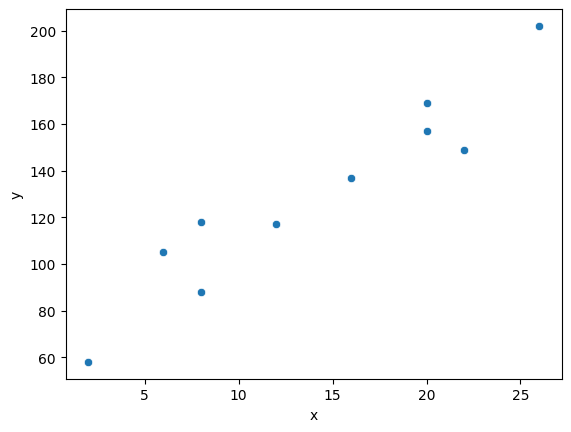

In [3]:
sns.scatterplot(x='x', y='y', data=datos_pizza)

Given the latter plot, it makes sense to perform a linear regression on this data. To do this we will use the `ols` function from the `statsmodels.formula.api` of the `statsmodels` library.

In [4]:
modelo_lineal_pizza = smf.ols(formula='y ~ x', data=datos_pizza).fit()
modelo_lineal_pizza.summary(alpha=0.01)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     74.25
Date:                Fri, 20 Oct 2023   Prob (F-statistic):           2.55e-05
Time:                        15:38:14   Log-Likelihood:                -39.342
No. Observations:                  10   AIC:                             82.68
Df Residuals:                       8   BIC:                             83.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.005      0.995]
------------------------------------------------------------------------------
Intercept     60.0000      9.226      6.503      0.000      29.043      90.957
x              5.0000      0.580      8.617      0.000       3.053       6.947
==============================================================================
Omnibus:                        0.928   Durbin-Watson:                   3.224
Prob(Omnibus):                  0.629   Jarque-Bera (JB):                0.616
Skew:                          -0.060   Prob(JB):                        0.735
Kurtosis:                       1.790   Cond. No.                         33.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As you can see, the linear regression summary provides a lot of information. We can see that both the coefficient of determination and its adjusted version are calculated. Also, the ANOVA test is performed on the parameters of the linear model. Furthermore, we get the confidence intervals for each parameter of the model and the values of their two-tailed hypothesis tests. The details of the calculation of several of these quantities can be found in the presentation.

### Residual Analysis

Residual analysis in the context of linear regression refers to the process of examining and analyzing the differences, or residuals, between the observed values of the dependent variable and the values predicted by the linear regression model. It is a critical step in assessing the quality of a linear regression model and the validity of its assumptions. Residual analysis helps identify potential problems such as heteroscedasticity, outliers, and violations of linearity or normality assumptions.

When we perform a linear regression, the values of the residuals are computed and become part of our model. We will store them in a new column of the `datos_pizza` dataframe.

In [5]:
datos_pizza['residuos'] = modelo_lineal_pizza.resid.values
datos_pizza

,x,y,residuos
0,2,58,-12.0
1,6,105,15.0
2,8,88,-12.0
3,8,118,18.0
4,12,117,-3.0
5,16,137,-3.0
6,20,157,-3.0
7,20,169,9.0
8,22,149,-21.0
9,26,202,12.0


One way to assess the quality of our linear regression is with a **residual plot**. These plots help identify potential non-linearity or heteroscedasticity by examining the relationship between the residuals and each predictor variable.

<Axes: xlabel='x', ylabel='residuos'>

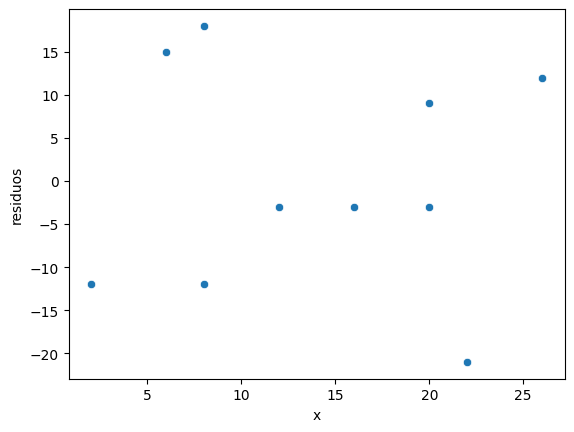

In [6]:
sns.scatterplot(x='x', y='residuos', data=datos_pizza)

Another helpful method for analyzing the residuals is the **Quantile-Quantile (QQ) plot**, also known as **QQ-plots**. These plots are a graphical tool used in statistics to assess whether a dataset follows a specific theoretical distribution, such as the normal distribution. It compares the quantiles of the observed data with the quantiles of the expected theoretical distribution, helping to visually determine if the data fits the assumed distribution.

Each point on the QQ-plot represents a pair of quantiles: one from the observed data and the other from the theoretical distribution. The points are arranged such that if the data perfectly follows the assumed distribution, they would lie along a 45-degree diagonal line ($y=x$).

This plot can be visualized using the `qqplot` function from the `statsmodels` library.

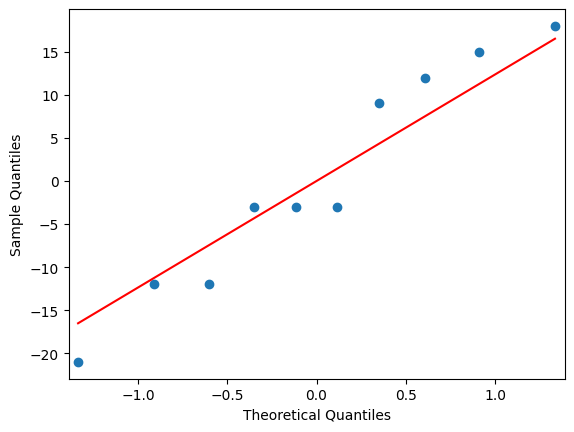

In [7]:
sm.qqplot(modelo_lineal_pizza.resid, line="s");

## Multiple Linear Regression

**Multiple linear regression** is a statistical technique used to model the relationship between a dependent variable and multiple independent variables (also known as predictors or characteristics). It is an extension of simple linear regression, which involves one independent variable and one dependent variable. In multiple linear regression, you have a single dependent variable, but you consider two or more independent variables to better explain and predict the variation in the dependent variable.

To illustrate how multiple regression works, we will work with the following data compiled by Showtime Movie Theater. The owners are interested in estimating weekly revenues based on advertising expenditures. Once again, this data will be stored in a dataframe.

In [8]:
datos_movie = {'publicidad_tv' :[5, 2, 4, 2.5, 3, 3.5, 2.5, 3], 'publicidad_per' : [1.5, 2, 1.5, 2.5, 3.3, 2.3, 4.2, 2.5], 'ingreso' : [96, 90, 95, 92, 95, 94, 94, 94]}
datos_movie = pd.DataFrame.from_dict(datos_movie)
datos_movie  

,publicidad_tv,publicidad_per,ingreso
0,5.0,1.5,96
1,2.0,2.0,90
2,4.0,1.5,95
3,2.5,2.5,92
4,3.0,3.3,95
5,3.5,2.3,94
6,2.5,4.2,94
7,3.0,2.5,94


To perform a linear regression on this data, we can use the `ols` function from the `statsmodels.formula.api` of the `statsmodels` library. Note that we need to change the `formula` parameter so that the function takes into account that we are working with two independent variables and one dependent variable.

In [9]:
modelo_lineal_movie = smf.ols(formula='ingreso ~ publicidad_tv + publicidad_per', data=datos_movie).fit()
modelo_lineal_movie.summary()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ingreso   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     28.38
Date:                Fri, 20 Oct 2023   Prob (F-statistic):            0.00187
Time:                        15:38:14   Log-Likelihood:                -5.9335
No. Observations:                   8   AIC:                             17.87
Df Residuals:                       5   BIC:                             18.11
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         83.2301      1.574     52.882      0.000      79.184      87.276
publicidad_tv      2.2902      0.304      7.532      0.001       1.509       3.072
publicidad_per     1.3010      0.321      4.057      0.010       0.477       2.125
==============================================================================
Omnibus:                        3.537   Durbin-Watson:                   2.174
Prob(Omnibus):                  0.171   Jarque-Bera (JB):                1.057
Skew:                           0.342   Prob(JB):                        0.589
Kurtosis:                       1.356   Cond. No.                         29.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As expected, the linear regression summary provides a lot of information that is useful in assessing how good our model is. The details of the calculation of several of these quantities can be found in the presentation.

### Residual Analysis

The ideas of residual analysis that we used for simple linear regression can be used to analyze the behavior of the residuals of the multiple regression model. One of the methods we used was the residual plot. In this case, we plot the values of the residuals against the values of our estimates, so we need to obtain these quantities. Fortunately, this information is contained in the object created by `Python` when we ran our linear regression. We will create two more columns for the dataframe `datos_movie` and store the residuals and the predictions.

In [10]:
datos_movie['estimado'] = modelo_lineal_movie.predict()
datos_movie['residuos'] = modelo_lineal_movie.resid.values
datos_movie

,publicidad_tv,publicidad_per,ingreso,estimado,residuos
0,5.0,1.5,96,96.632493,-0.632493
1,2.0,2.0,90,90.412437,-0.412437
2,4.0,1.5,95,94.342310,0.657690
3,2.5,2.5,92,92.208023,-0.208023
4,3.0,3.3,95,94.393907,0.606093
5,3.5,2.3,94,94.238009,-0.238009
6,2.5,4.2,94,94.419705,-0.419705
7,3.0,2.5,94,93.353115,0.646885


Again, we plot the residuals to assess the quality of the linear regression. Since this is a multiple regression, we need to plot the residuals against the values of the linear model estimates.

<Axes: xlabel='estimado', ylabel='residuos'>

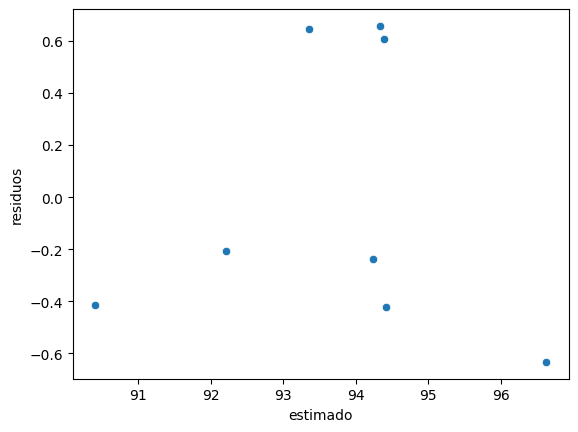

In [11]:
sns.scatterplot(x='estimado', y='residuos', data=datos_movie)

As expected, a QQ plot can be visualized. Note that regardless of the type of linear regression, if the residuals follow a normal distribution, the blue points of the QQ plot should be fairly close to a line with a slope equal to one.

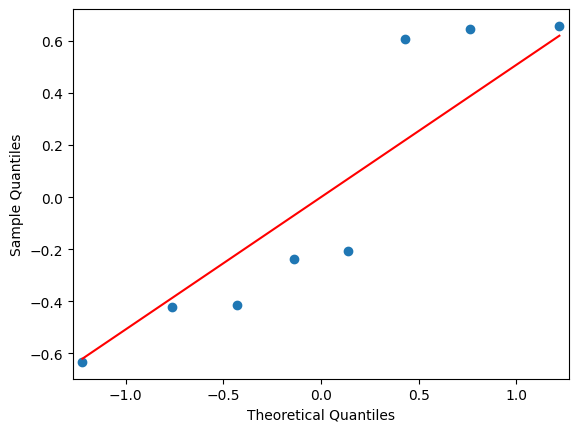

In [12]:
sm.qqplot(modelo_lineal_movie.resid, line="s");

### Collinearity

**Collinearity**, in the context of multiple linear regression, refers to a situation in which two or more independent variables in a regression model are highly correlated with each other. In other words, collinearity occurs when there is a strong linear relationship between two or more predictors. This can cause problems in regression analysis because it can make it difficult to determine the individual contributions of these correlated variables to the dependent variable.

One way to determine whether there is a strong correlation between the independent variables is to use a **correlation matrix**: the ijth component of a correlation matrix is equal to the correlation of the variables $x_i$ and $x_j$. The `seaborn` library comes with the `heatmap` method, which can be quite useful for visualizing these matrices.

Text(0.5, 1.0, 'Correlaciones entre las variables independientes')

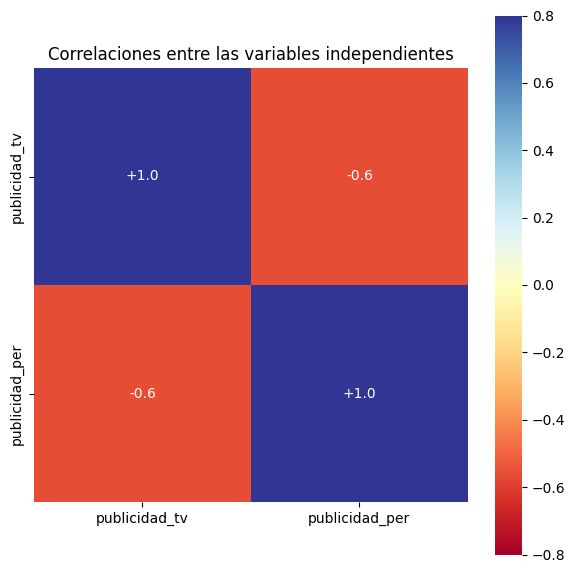

In [13]:
plt.figure(figsize=(7,7))
sns.heatmap(datos_movie[['publicidad_tv', 'publicidad_per']].corr(), cmap="RdYlBu", 
    annot=True, square=True,
    vmin=-0.8, vmax=0.8, fmt="+.1f")
plt.title("Correlaciones entre las variables independientes")

We can see that there is a strong correlation between the variables `publicidad_per` and `publicidad_tv`, so we may have to consider the idea of either omitting one of these two variables or combining them into a single explanatory variable.